<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%jsroot on
TCanvas c;

γ的探测效率可以通过$\frac{N_{\gamma}(\beta)}{I_{\gamma(\beta)} * \varepsilon_{\beta} * N_{hi}}$获得。$N_{\gamma}(\beta)$表示βγ衰变的γ峰的计数，$I_{\gamma(\beta)}$是这个γ的强度(通过NNDC可以查到)，$\varepsilon_\beta$表示β的探测效率，$N_{hi}$表示重离子的数目。这个公式分子表示的实际探测到的γ效率，分母表示理论上考虑了β探测效率之后的γ效率。

不同的$Q_β$在探测器上响应一致，这一点在模拟中得到印证。这里认为对不同核该效率保持一致。
从而从原理上可以进行刻度。

其中$N_{\gamma}(\beta)$和$N_{hi}$是需要计算的量。

选用Si25、Mg21、P26这几个核的βγ分支的γ做验证。

Si25的能级纲图如下，βγ共有四支,452keV(18.4%),493keV(15.3%),945keV(10.4%),1612keV(14.7%),βpγ有1370keV.

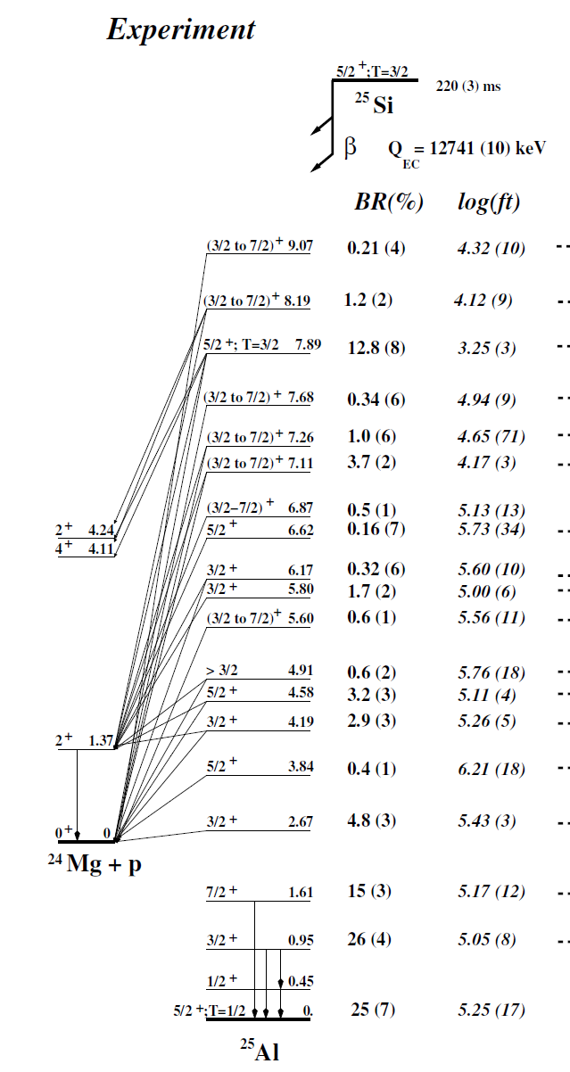
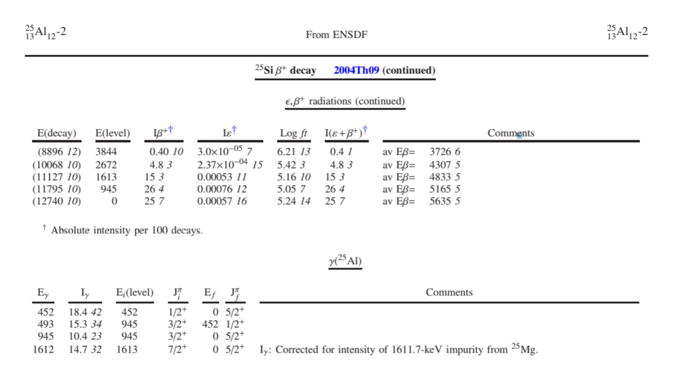

Si25在中间Si阻停的重离子数为4541702，后面Si阻停的重离子数为2568439.

In [2]:
TFile fSi25_50("corrsi25_50.root");
tree->Draw("le1>>h1(1000,0,10000)","cond==1&&bz==1&&dtime<220*5");
tree->Draw("le1>>h2(1000,0,10000)","cond==1&&bz==1&&dtime>5000-220*5");
h1->Sumw2();
h1->Add(h2,-1);
h1->Draw();
c.Draw();

In [3]:
c.Clear();
tree->Draw("bea>>h3(1000,0,10000)","cond==1&&bz==2&&dtime<220*5");
tree->Draw("bea>>h4(1000,0,10000)","cond==1&&bz==2&&dtime>5000-220*5");
h3->Sumw2();
h3->Add(h4,-1);
h3->Draw();
c.Draw();

In [4]:
c.Clear();
tree->Draw("gea>>g1(8000,0,4000)","cond==1&&bz==1&&dtime<220*5");
tree->Draw("gea>>g2(8000,0,4000)","cond==1&&bz==1&&dtime>5000-220*5");
g1->Sumw2();
g1->Add(g2,-1);
g1->Draw();
c.Draw();

In [5]:
c.Clear();
tree->Draw("gea>>g3(8000,0,4000)","cond==1&&bz==2&&dtime<220*5");
tree->Draw("gea>>g4(8000,0,4000)","cond==1&&bz==2&&dtime>5000-220*5");
g3->Sumw2();
g3->Add(g4,-1);
g3->Draw();
c.Draw();

In [6]:
TF1 *sfit; //TF1指针定义在外部，避免定义在smart()内部时出现变量冲突。

In [7]:
TString fit(Double_t a,Double_t b,TString name){
    TString rtn;
    rtn.Form("Double_t %s(Double_t *x,Double_t *par){if(x[0]>%f&&x[0]<%f){TF1::RejectPoint();return 0;}return par[0]+par[1]*x[0];}",name.Data(),a,b);
    return rtn;
}//返回函数的字符串，避免每次手动修改函数脚本。

In [8]:
void smartfit(TH1F *h,Double_t fitl,Double_t fitr,Double_t cutl,Double_t cutr,TString name,TString option){
    //h为参与拟合的一维谱，fitl，fitr为参与拟合的总区间范围，cutl，cutr为不参与拟合的区间，name为拟合函数的名称。多次调用本函数时，应避免name重复。
    gROOT->ProcessLine(fit(cutl,cutr,name));
    //函数指针的方式实现动态调整函数参数比较麻烦，暂无法实现。采用gROOT则可以很简单地实现该目的。
    TString cmd;
    cmd.Form("sfit=new TF1(\"sfit\",%s,0,5000,2)",name.Data());
    gROOT->ProcessLine(cmd.Data());
    //终端环境下，cmd字符串内的name内容会被识别为函数名，但脚本中name表示的是字符串。或许可以用其他方式来实现该目的，但目前这种已足够简便。
    h->Fit("sfit",option,"",fitl,fitr);
}

In [9]:
c.Clear();
smartfit(g3,390,480,440,460,"k1","L");
c.Draw();

(TF1 *) 0x7ff6e0d7e5e0
 FCN=215.45 FROM MIGRAD    STATUS=CONVERGED     119 CALLS         120 TOTAL
                     EDM=5.16371e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.01205e+02   1.94646e+01  -8.71204e-02   7.19328e-05
   2  p1          -4.01636e-01   4.49301e-02   2.08482e-04   3.17865e-02
                               ERR DEF= 0.5


In [10]:
cout<<g3->Integral(880,920)<<'\n'<<(1+920-880)*(4.01205e+02-4.01636e-01*(880+920.0)/4)<<endl;

15441
9039.22


In [11]:
cout<<g3->Integral(960,992)<<'\n'<<(1+992-960)*(4.01205e+02-4.01636e-01*(960+992.0)/4)<<endl;

13119
6771.82


In [12]:
c.Clear();
smartfit(g3,700,1050,930,950,"k2","L");
c.Draw();

(TF1 *) 0x7ff6e0ea49b0
 FCN=860.06 FROM MIGRAD    STATUS=CONVERGED     127 CALLS         128 TOTAL
                     EDM=3.2478e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.22272e+01   2.16641e+00   5.28344e-03   6.71808e-05
   2  p1          -5.35222e-02   2.43262e-03   5.93267e-06   6.11264e-02
                               ERR DEF= 0.5


In [13]:
cout<<g3->Integral(1860,1900)<<'\n'<<(1+1900-1860)*(9.22272e+01-5.35222e-02*(1900+1860.0)/4)<<endl;

4918
1718.57


In [14]:
c.Clear();
smartfit(g3,1460,1760,1600,1620,"k3","L");
c.Draw();

(TF1 *) 0x7ff6e0e5c450
 FCN=850.716 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=5.23448e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.33130e+01   2.09167e+00   2.68495e-03  -1.71620e-03
   2  p1          -2.65930e-02   1.28083e-03   1.64411e-06  -2.79324e+00
                               ERR DEF= 0.5


In [15]:
cout<<g3->Integral(3200,3400)<<'\n'<<(1+3400-3200)*(5.33130e+01-2.65930e-02*(3200+3400.0)/4)<<endl;

5669
1896.34


Mg21的能级纲图如下，βγ共有四支,332keV(51%),1384keV(10%),1716keV(0.76%),βpγ有1633keV.

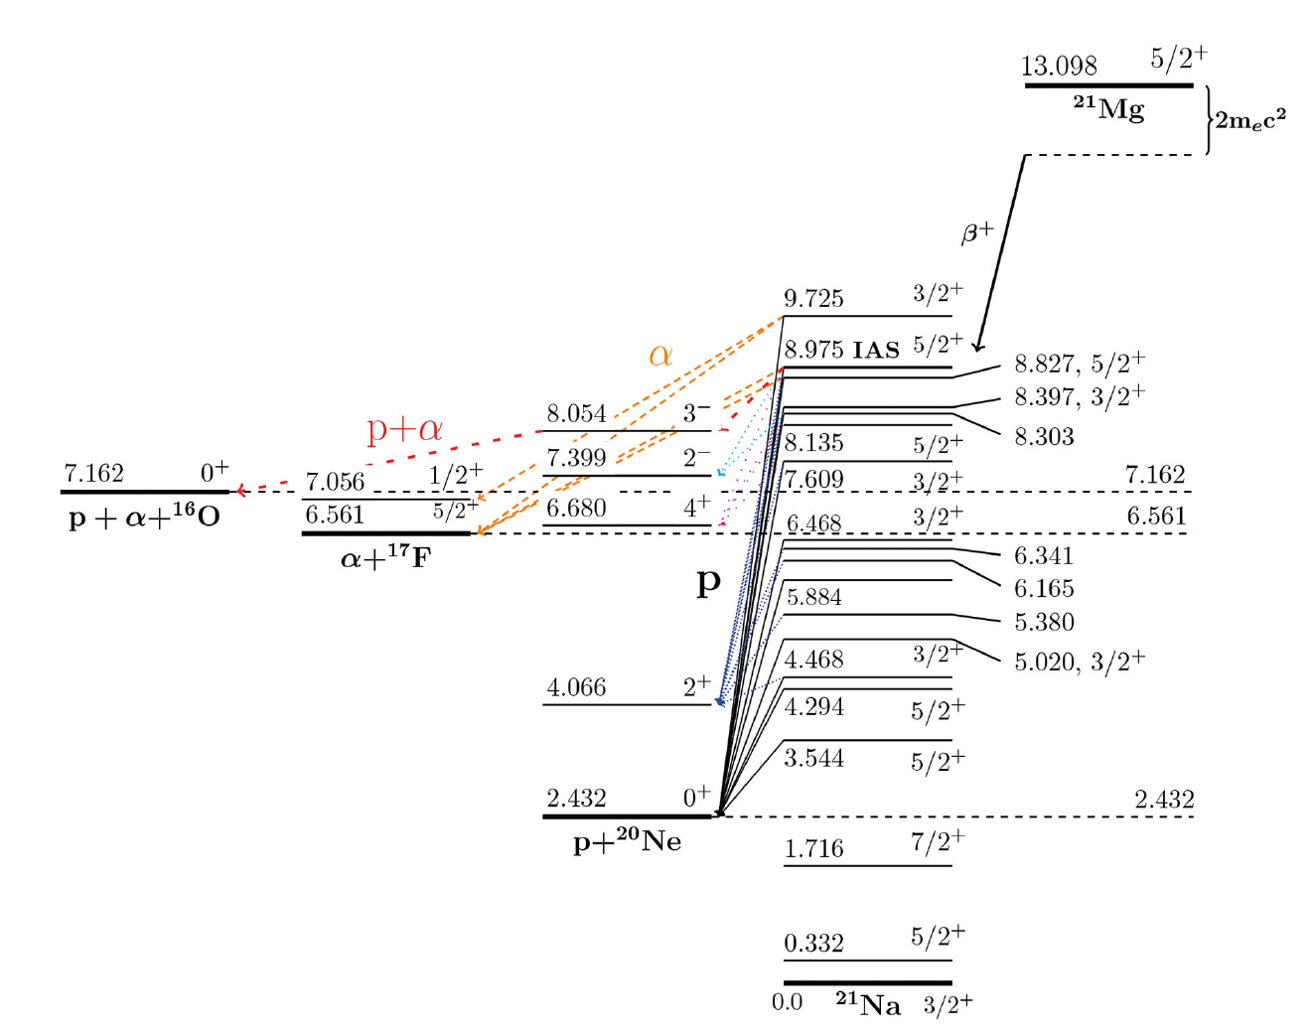
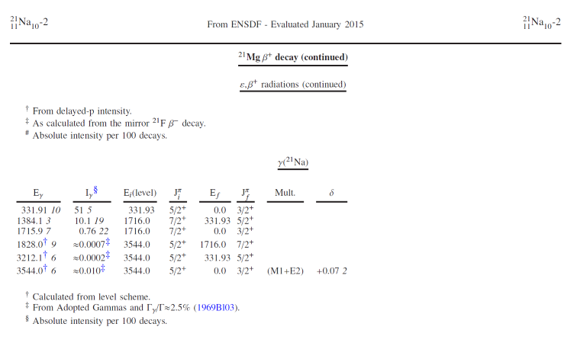

In [16]:
TFile fMg50("corrmg_50.root");
fMg50.cd();
tree->Draw("le1>>d1(1000,0,10000)","cond==1&&bz==1&&dtime<122*5");
tree->Draw("le1>>d2(1000,0,10000)","cond==1&&bz==1&&dtime>5000-122*5");
d1->Sumw2();
d1->Add(d2,-1);
d1->Draw();
c.Draw();

In [17]:
c.Clear();
tree->Draw("bea>>d3(1000,0,10000)","cond==1&&bz==2&&dtime<122*5");
tree->Draw("bea>>d4(1000,0,10000)","cond==1&&bz==2&&dtime>5000-122*5");
d3->Sumw2();
d3->Add(d4,-1);
d3->Draw();
c.Draw();

In [18]:
c.Clear();
tree->Draw("gea>>f1(8000,0,4000)","cond==1&&bz==1&&dtime<122*5");
tree->Draw("gea>>f2(8000,0,4000)","cond==1&&bz==1&&dtime>5000-122*5");
f1->Sumw2();
f1->Add(f2,-1);
f1->Draw();
c.Draw();

In [19]:
c.Clear();
tree->Draw("gea>>f3(8000,0,4000)","cond==1&&bz==2&&dtime<122*5");
tree->Draw("gea>>f4(8000,0,4000)","cond==1&&bz==2&&dtime>5000-122*5");
f3->Sumw2();
f3->Add(f4,-1);
f3->Draw();
c.Draw();

In [20]:
c.Clear();
smartfit(f3,200,450,300,350,"t1","L");
c.Draw();

(TF1 *) 0x7ff6e0f90030
 FCN=580.075 FROM MIGRAD    STATUS=CONVERGED     152 CALLS         153 TOTAL
                     EDM=2.67799e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.58309e+02   3.16085e+00  -1.58670e-02   4.31639e-05
   2  p1          -1.05753e+00   8.55862e-03   4.06672e-05   8.08810e-03
                               ERR DEF= 0.5


In [21]:
cout<<f3->Integral(600,700)<<'\n'<<(1+700-600)*(5.58309e+02-1.05753*(600+700.0)/4)<<endl;

48794
21675.8


In [22]:
c.Clear();
smartfit(f3,1200,1600,1360,1400,"t2","L");
c.Draw();

(TF1 *) 0x7ff6e0fcb6e0
 FCN=624.237 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=4.87637e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.67122e+01   1.36867e+00   2.05271e-03   1.79752e-03
   2  p1          -2.54257e-02   9.49468e-04   1.42401e-06   2.52301e+00
                               ERR DEF= 0.5


In [23]:
cout<<f3->Integral(2720,2800)<<'\n'<<(1+2800-2720)*(4.67122e+01-2.54257e-02*(2800+2720.0)/4)<<endl;

4616
941.603


In [24]:
c.Clear();
smartfit(f3,1650,1740,1700,1730,"t3","L");
c.Draw();

(TF1 *) 0x7ff6e113e6e0
 FCN=96.0341 FROM MIGRAD    STATUS=CONVERGED     104 CALLS         105 TOTAL
                     EDM=1.15455e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.75506e+01   4.94818e+00   1.29083e-03  -1.78597e-03
   2  p1          -1.96690e-02   2.93028e-03   7.64468e-07  -3.01644e+00
                               ERR DEF= 0.5


In [25]:
cout<<f3->Integral(3400,3460)<<'\n'<<(1+3460-3400)*(3.75506e+01-1.96690e-02*(3400+3460.0)/4)<<endl;

484
232.914


P26的能级纲图如下，βγ 1796keV(58%).

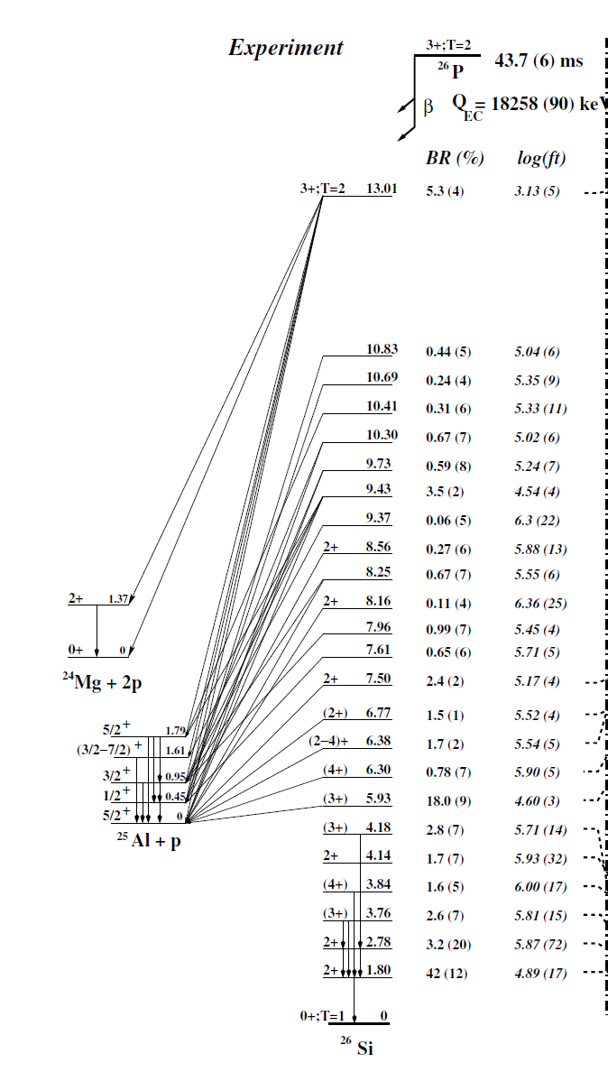
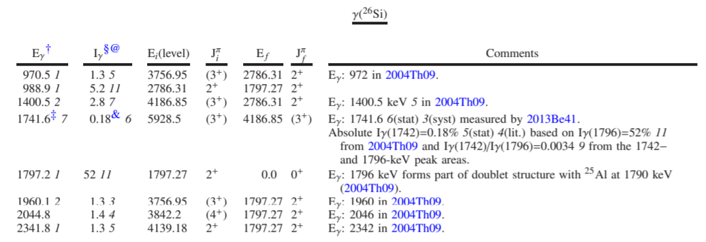

In [26]:
TFile fp26_50("corrp26_50.root");
fp26_50.cd();
tree->Draw("be>>q1(1000,0,10000)","cond==1&&bz==1&&dtime<44*5");
tree->Draw("be>>q2(1000,0,10000)","cond==1&&bz==1&&dtime>5000-44*5");
q1->Sumw2();
q1->Add(q2,-1);
q1->Draw();
c.Draw();

In [27]:
c.Clear();
tree->Draw("bea>>q3(1000,0,10000)","cond==1&&bz==2&&dtime<44*5");
tree->Draw("bea>>q4(1000,0,10000)","cond==1&&bz==2&&dtime>5000-44*5");
q3->Sumw2();
q3->Add(q4,-1);
q3->Draw();
c.Draw();

In [28]:
c.Clear();
tree->Draw("gea>>a1(10000,0,5000)","cond==1&&bz==1&&dtime<44*5");
tree->Draw("gea>>a2(10000,0,5000)","cond==1&&bz==1&&dtime>5000-44*5");
a1->Sumw2();
a1->Add(a2,-1);
a1->Draw();
c.Draw();

In [29]:
c.Clear();
tree->Draw("gea>>a3(10000,0,5000)","cond==1&&bz==2&&dtime<44*5");
tree->Draw("gea>>a4(10000,0,5000)","cond==1&&bz==2&&dtime>5000-44*5");
a3->Sumw2();
a3->Add(a4,-1);
a3->Draw();
c.Draw();

In [30]:
c.Clear();
smartfit(a3,1650,1950,1780,1800,"c0","L");
c.Draw();

(TF1 *) 0x7ff6e2d2b4e0
 FCN=354.844 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=3.31013e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.75813e+00   6.37476e-01   5.79721e-04   4.39327e-05
   2  p1          -4.17251e-03   3.47484e-04   3.15992e-07   1.73611e+00
                               ERR DEF= 0.5


In [31]:
cout<<a3->Integral(3560,3600)<<'\n'<<(1+3600-3560)*(8.75813-4.17251e-03*(3560+3600.0)/4)<<endl;

989
52.8628


In [32]:
fp26_50.Close();

Na20有βγ 1633keV(79.44%).
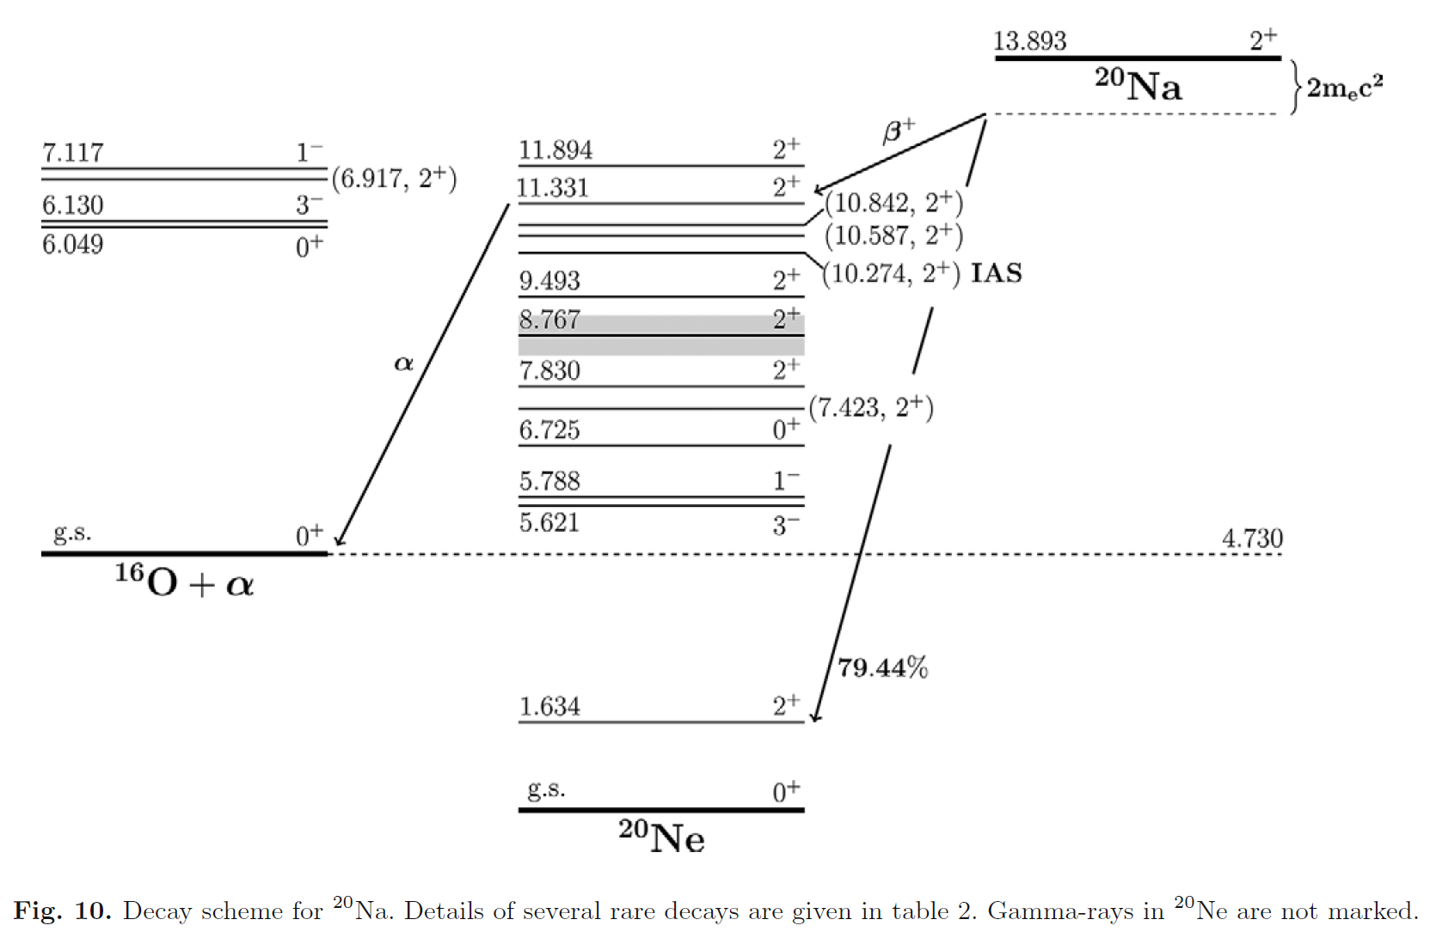

In [33]:
TFile fNa20("corrna50.root");
fNa20.cd();
tree->Draw("bea>>z1(1000,0,10000)","cond==1&&bz==2&&dtime<448*5");
tree->Draw("bea>>z2(1000,0,10000)","cond==1&&bz==2&&dtime>5000-448*5");
z1->Sumw2();
z1->Add(z2,-1);
z1->Draw();
c.Draw();

In [34]:
c.Clear();
tree->Draw("gea>>s1(10000,0,5000)","cond==1&&bz==1&&dtime<448*5");
tree->Draw("gea>>s2(10000,0,5000)","cond==1&&bz==1&&dtime>5000-448*5");
s1->Sumw2();
s1->Add(s2,-1);
s1->Draw();
c.Draw();

In [35]:
c.Clear();
tree->Draw("gea>>s3(10000,0,5000)","cond==1&&bz==2&&dtime<448*5");
tree->Draw("gea>>s4(10000,0,5000)","cond==1&&bz==2&&dtime>5000-448*5");
s3->Sumw2();
s3->Add(s4,-1);
s3->Draw();
c.Draw();

In [36]:
c.Clear();
smartfit(s3,1500,1800,1610,1640,"q0","L");
c.Draw();

(TF1 *) 0x7ff6e3e9f970
 FCN=993.013 FROM MIGRAD    STATUS=CONVERGED     132 CALLS         133 TOTAL
                     EDM=5.76023e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.54735e+02   2.64552e+00   3.71488e-03   4.18366e-04
   2  p1          -8.19037e-02   1.55633e-03   2.18548e-06   5.62441e-01
                               ERR DEF= 0.5


In [37]:
cout<<s3->Integral(3220,3280)<<'\n'<<(1+3280-3220)*(1.54735e+02-8.19037e-02*(3280+3220.0)/4)<<endl;

31418
1320.13
